<a href="https://colab.research.google.com/github/camiloacr1322/python_repositorio1/blob/main/parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("Dat_Ri_Fa_123.xlsx")

print("Dimensiones del dataset:", df.shape)
#df.head()


Dimensiones del dataset: (310743, 19)


In [38]:
# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes["estrato"])
print(df.dtypes["Tipo de Vivienda"])
print(df.dtypes["Energía Eléctrica"])


# Columnas categóricas (primeras 6)
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("\nColumnas categóricas detectadas:", categorical_cols[:6])


print(df["estrato"].value_counts(dropna=False))
print(df["Genero"].value_counts(dropna=False))





Tipos de datos:
int64
object
object

Columnas categóricas detectadas: ['Criterio Geografico', 'Tipo de Vivienda', 'Tenencia de la Vivienda', 'Ingreso Economico de la Familia', '¿Hubo alguna vez en que usted haya sentido hambre, pero no comió porque no había suficiente dinero u otros recursos para obtener alimentos?', '¿Hubo alguna vez en que usted haya dejado de comer todo un día por falta de dinero u otros recursos?']
estrato
2    175488
1     80783
3     52505
4      1480
5       425
6        62
Name: count, dtype: int64
Genero
FEMENINO              201227
MASCULINO             109313
HOMBRE TRANSGENERO       103
MUJER TRANSGENERO         51
NO BINARIO                49
Name: count, dtype: int64


In [41]:
###Datos faltantes

print("=== ANÁLISIS DE DATOS FALTANTES ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100


print("Top 2 columnas con más datos faltantes:")
missing_info = pd.DataFrame({
'Columna': missing_data.index,
'Datos_Faltantes': missing_data.values,
'Porcentaje': missing_percent.values
}).sort_values('Datos_Faltantes', ascending=False)
print(missing_info.head(2))

=== ANÁLISIS DE DATOS FALTANTES ===
Top 2 columnas con más datos faltantes:
                Columna  Datos_Faltantes  Porcentaje
11          descripcion            67587   21.750128
1   Criterio Geografico                0    0.000000


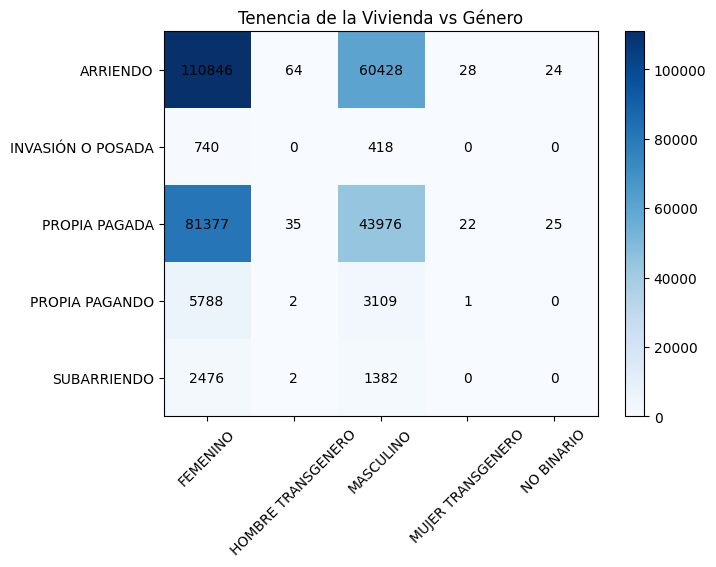

In [61]:
tabla = pd.crosstab(df["Tenencia de la Vivienda"], df["Genero"])

fig, ax = plt.subplots(figsize=(7,5))
im = ax.imshow(tabla.values, aspect="auto", cmap="Blues")

ax.set_xticks(range(tabla.shape[1]))
ax.set_xticklabels(tabla.columns, rotation=45)
ax.set_yticks(range(tabla.shape[0]))
ax.set_yticklabels(tabla.index)

for i in range(tabla.shape[0]):
    for j in range(tabla.shape[1]):
        ax.text(j, i, tabla.values[i, j], ha="center", va="center", color="black")

plt.colorbar(im)
plt.title("Tenencia de la Vivienda vs Género")
plt.show()

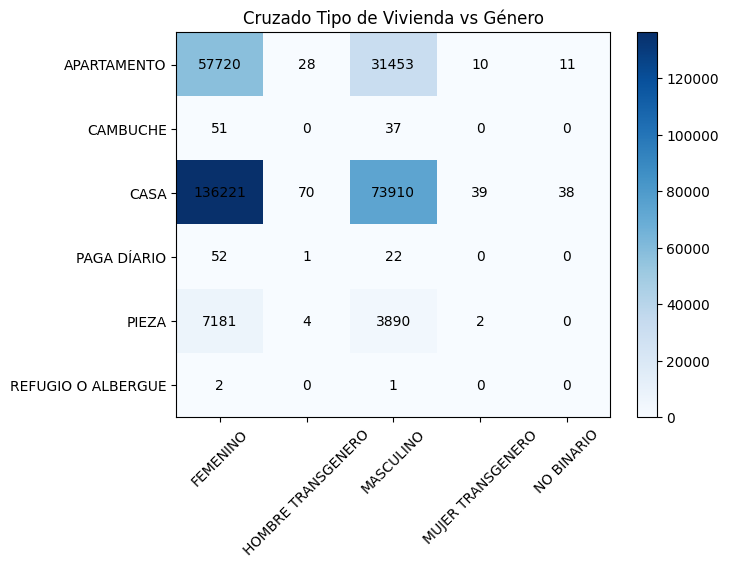

In [62]:
tabla = pd.crosstab(df["Tipo de Vivienda"], df["Genero"])

fig, ax = plt.subplots(figsize=(7,5))
im = ax.imshow(tabla.values, aspect="auto", cmap="Blues")

ax.set_xticks(range(tabla.shape[1]))
ax.set_xticklabels(tabla.columns, rotation=45)
ax.set_yticks(range(tabla.shape[0]))
ax.set_yticklabels(tabla.index)

for i in range(tabla.shape[0]):
    for j in range(tabla.shape[1]):
        ax.text(j, i, tabla.values[i, j], ha="center", va="center", color="black")

plt.colorbar(im)
plt.title("Cruzado Tipo de Vivienda vs Género")
plt.show()

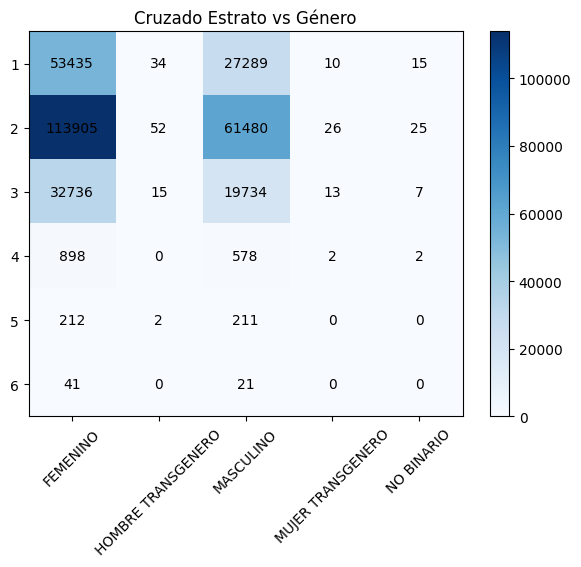

In [58]:
# Estrato vs Género
tabla = pd.crosstab(df["estrato"], df["Genero"])

fig, ax = plt.subplots(figsize=(7,5))
im = ax.imshow(tabla.values, aspect="auto", cmap="Blues")

ax.set_xticks(range(tabla.shape[1]))
ax.set_xticklabels(tabla.columns, rotation=45)
ax.set_yticks(range(tabla.shape[0]))
ax.set_yticklabels(tabla.index)

for i in range(tabla.shape[0]):
    for j in range(tabla.shape[1]):
        ax.text(j, i, tabla.values[i, j], ha="center", va="center", color="black")

plt.colorbar(im)
plt.title("Cruzado Estrato vs Género")
plt.show()

=== INSEGURIDAD ALIMENTARIA POR ESTRATO ===
inseguridad_alimentaria  Sin inseguridad
estrato                                 
1                                  100.0
2                                  100.0
3                                  100.0
4                                  100.0
5                                  100.0
6                                  100.0


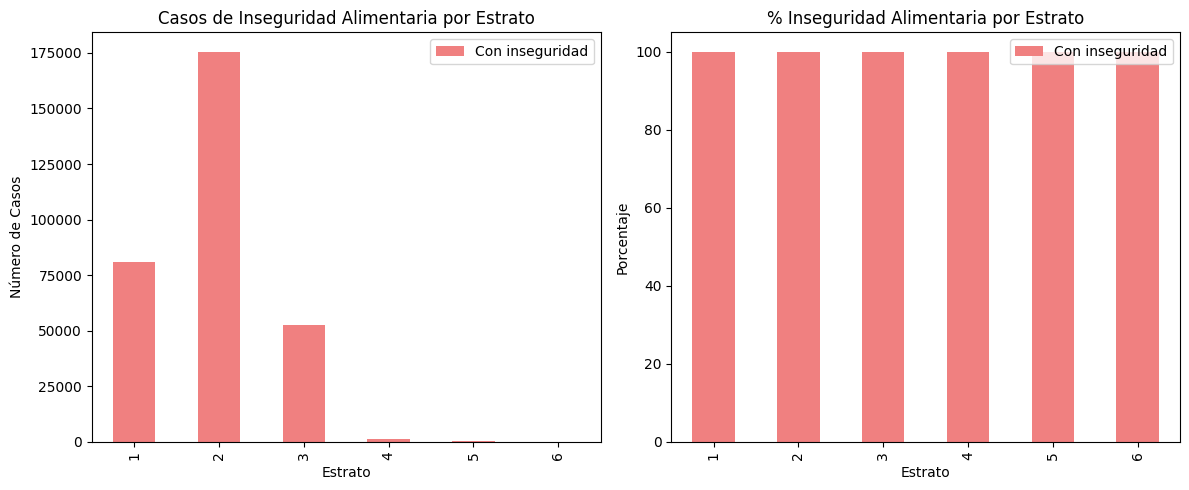

In [65]:
### 4 punto

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Cargar datos
df = pd.read_excel('Dat_Ri_Fa_123.xlsx')
# Crear variable de inseguridad alimentaria
df['inseguridad_alimentaria'] = np.where(
 (df['¿Hubo alguna vez en que usted haya sentido hambre, pero no comió porque no había suficiente dinero u otros recursos para obtener alimentos?'] == 'Sí') |
 (df['¿Hubo alguna vez en que usted haya dejado de comer todo un día por falta de dinero u otros recursos?'] == 'Sí'),
 'Con inseguridad', 'Sin inseguridad'
)
# Análisis por estrato
analisis_estrato = df.groupby(['estrato', 'inseguridad_alimentaria']).size().unstack(fill_value=0)
porcentajes = analisis_estrato.div(analisis_estrato.sum(axis=1), axis=0) * 100
print("=== INSEGURIDAD ALIMENTARIA POR ESTRATO ===")
print(porcentajes.round(1))
# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Gráfico 1: Valores absolutos
analisis_estrato.plot(kind='bar', ax=ax1, color=['lightcoral', 'lightblue'])
ax1.set_title('Casos de Inseguridad Alimentaria por Estrato')
ax1.set_xlabel('Estrato')
ax1.set_ylabel('Número de Casos')
ax1.legend(['Con inseguridad', 'Sin inseguridad'])
# Gráfico 2: Porcentajes
porcentajes.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightblue'])
ax2.set_title('% Inseguridad Alimentaria por Estrato')
ax2.set_xlabel('Estrato')
ax2.set_ylabel('Porcentaje')
ax2.legend(['Con inseguridad', 'Sin inseguridad'])
plt.tight_layout()
plt.show()